## Лекція 62. Image Feature Extraction

### Завдання:

#### 1.	Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра Собеля.
#### 2.	Використовуючи метод густини градієнта (HOG), напишіть код для витягування ознак з зображення.

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from mpl_toolkits.axes_grid1 import ImageGrid
import warnings
warnings.filterwarnings("ignore")

### 1.	Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра Собеля.

In [2]:
# Завантаження зображення
img = cv2.imread('image.jpg')

# Конвертування до чорно-білого
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Фільтр Собеля для визначення границь
sobelx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)

# Обчислення абсолютного значення градієнта
abs_sobelx = cv2.convertScaleAbs(sobelx)
abs_sobely = cv2.convertScaleAbs(sobely)
grad = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)

# Визначення кутів
angle = cv2.phase(sobelx, sobely, angleInDegrees=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


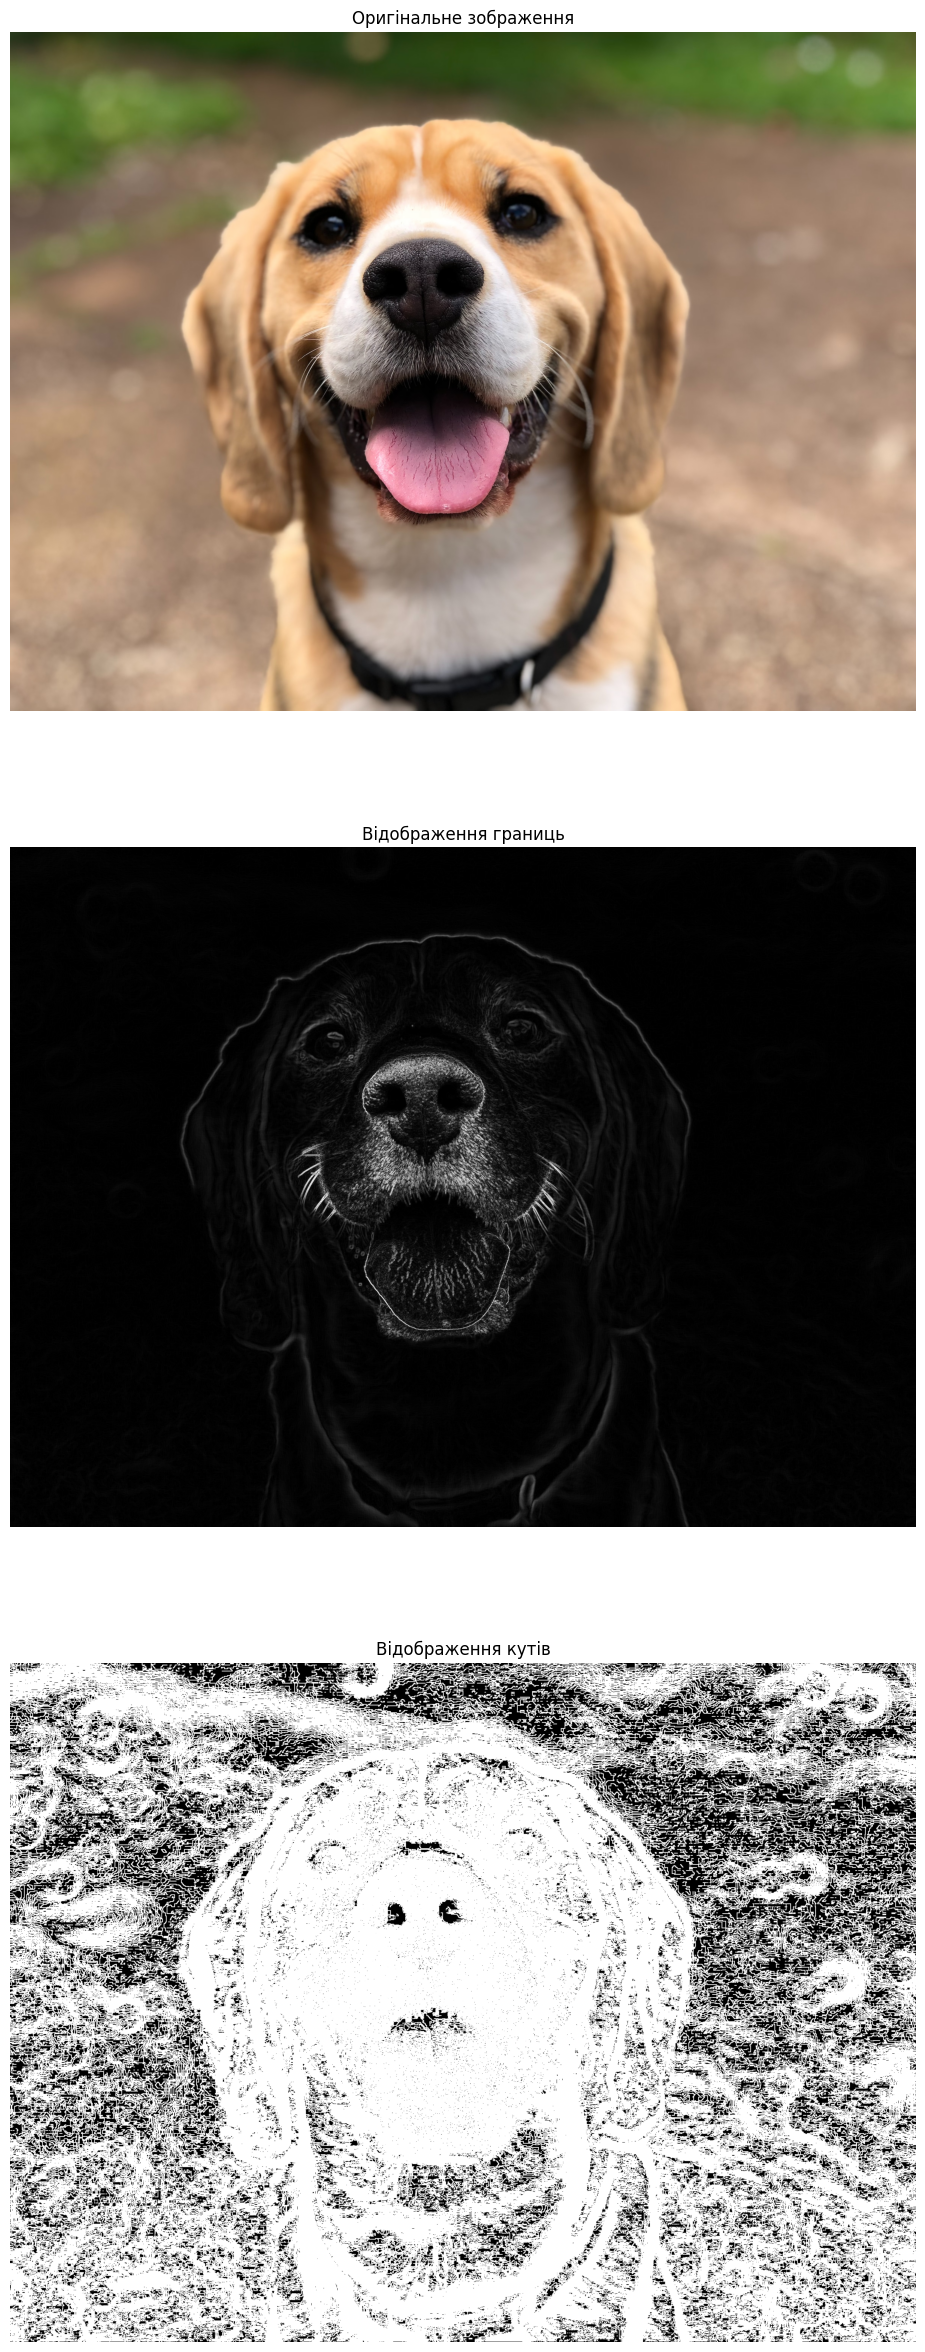

In [3]:
# Порівнюємо зображення
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grad1 = cv2.cvtColor(grad, cv2.COLOR_BGR2RGB)
angle1 = cv2.cvtColor(angle, cv2.COLOR_BGR2RGB)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(45, 30), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img1, cmap=plt.cm.gray)
ax1.set_title('Оригінальне зображення')

ax2.axis('off')
ax2.imshow(grad1, cmap=plt.cm.gray)
ax2.set_title('Відображення границь')

ax3.axis('off')
ax3.imshow(angle1, cmap=plt.cm.gray)
ax3.set_title('Відображення кутів')
plt.show()

### 2.	Використовуючи метод густини градієнта (HOG), напишіть код для витягування ознак з зображення.

In [4]:

# Завантажити зображення
img = cv2.imread('image.jpg')

# Конвертувати зображення в чорно-біле
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Створити HOG дескриптор
hog = cv2.HOGDescriptor()

# Обчислити HOG ознаки
features = hog.compute(gray)

# Вивести результат
print(features)

[0.11717035 0.10567893 0.31623045 ... 0.0701027  0.01798986 0.03050769]


The hog() function takes 6 parameters as input:

image: The target image you want to apply HOG feature extraction.

orientations: Number of bins in the histogram we want to create, the original research paper used 9 bins so we will pass 9 as orientations.

pixels_per_cell: Determines the size of the cell, as we mentioned earlier, it is 8x8.

cells_per_block: Number of cells per block, will be 2x2 as mentioned previously.

visualize: A boolean whether to return the image of the HOG, we set it to True so we can show the image.

multichannel: We set it to True to tell the function that the last dimension is considered as a color channel, instead of spatial.

In [7]:
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

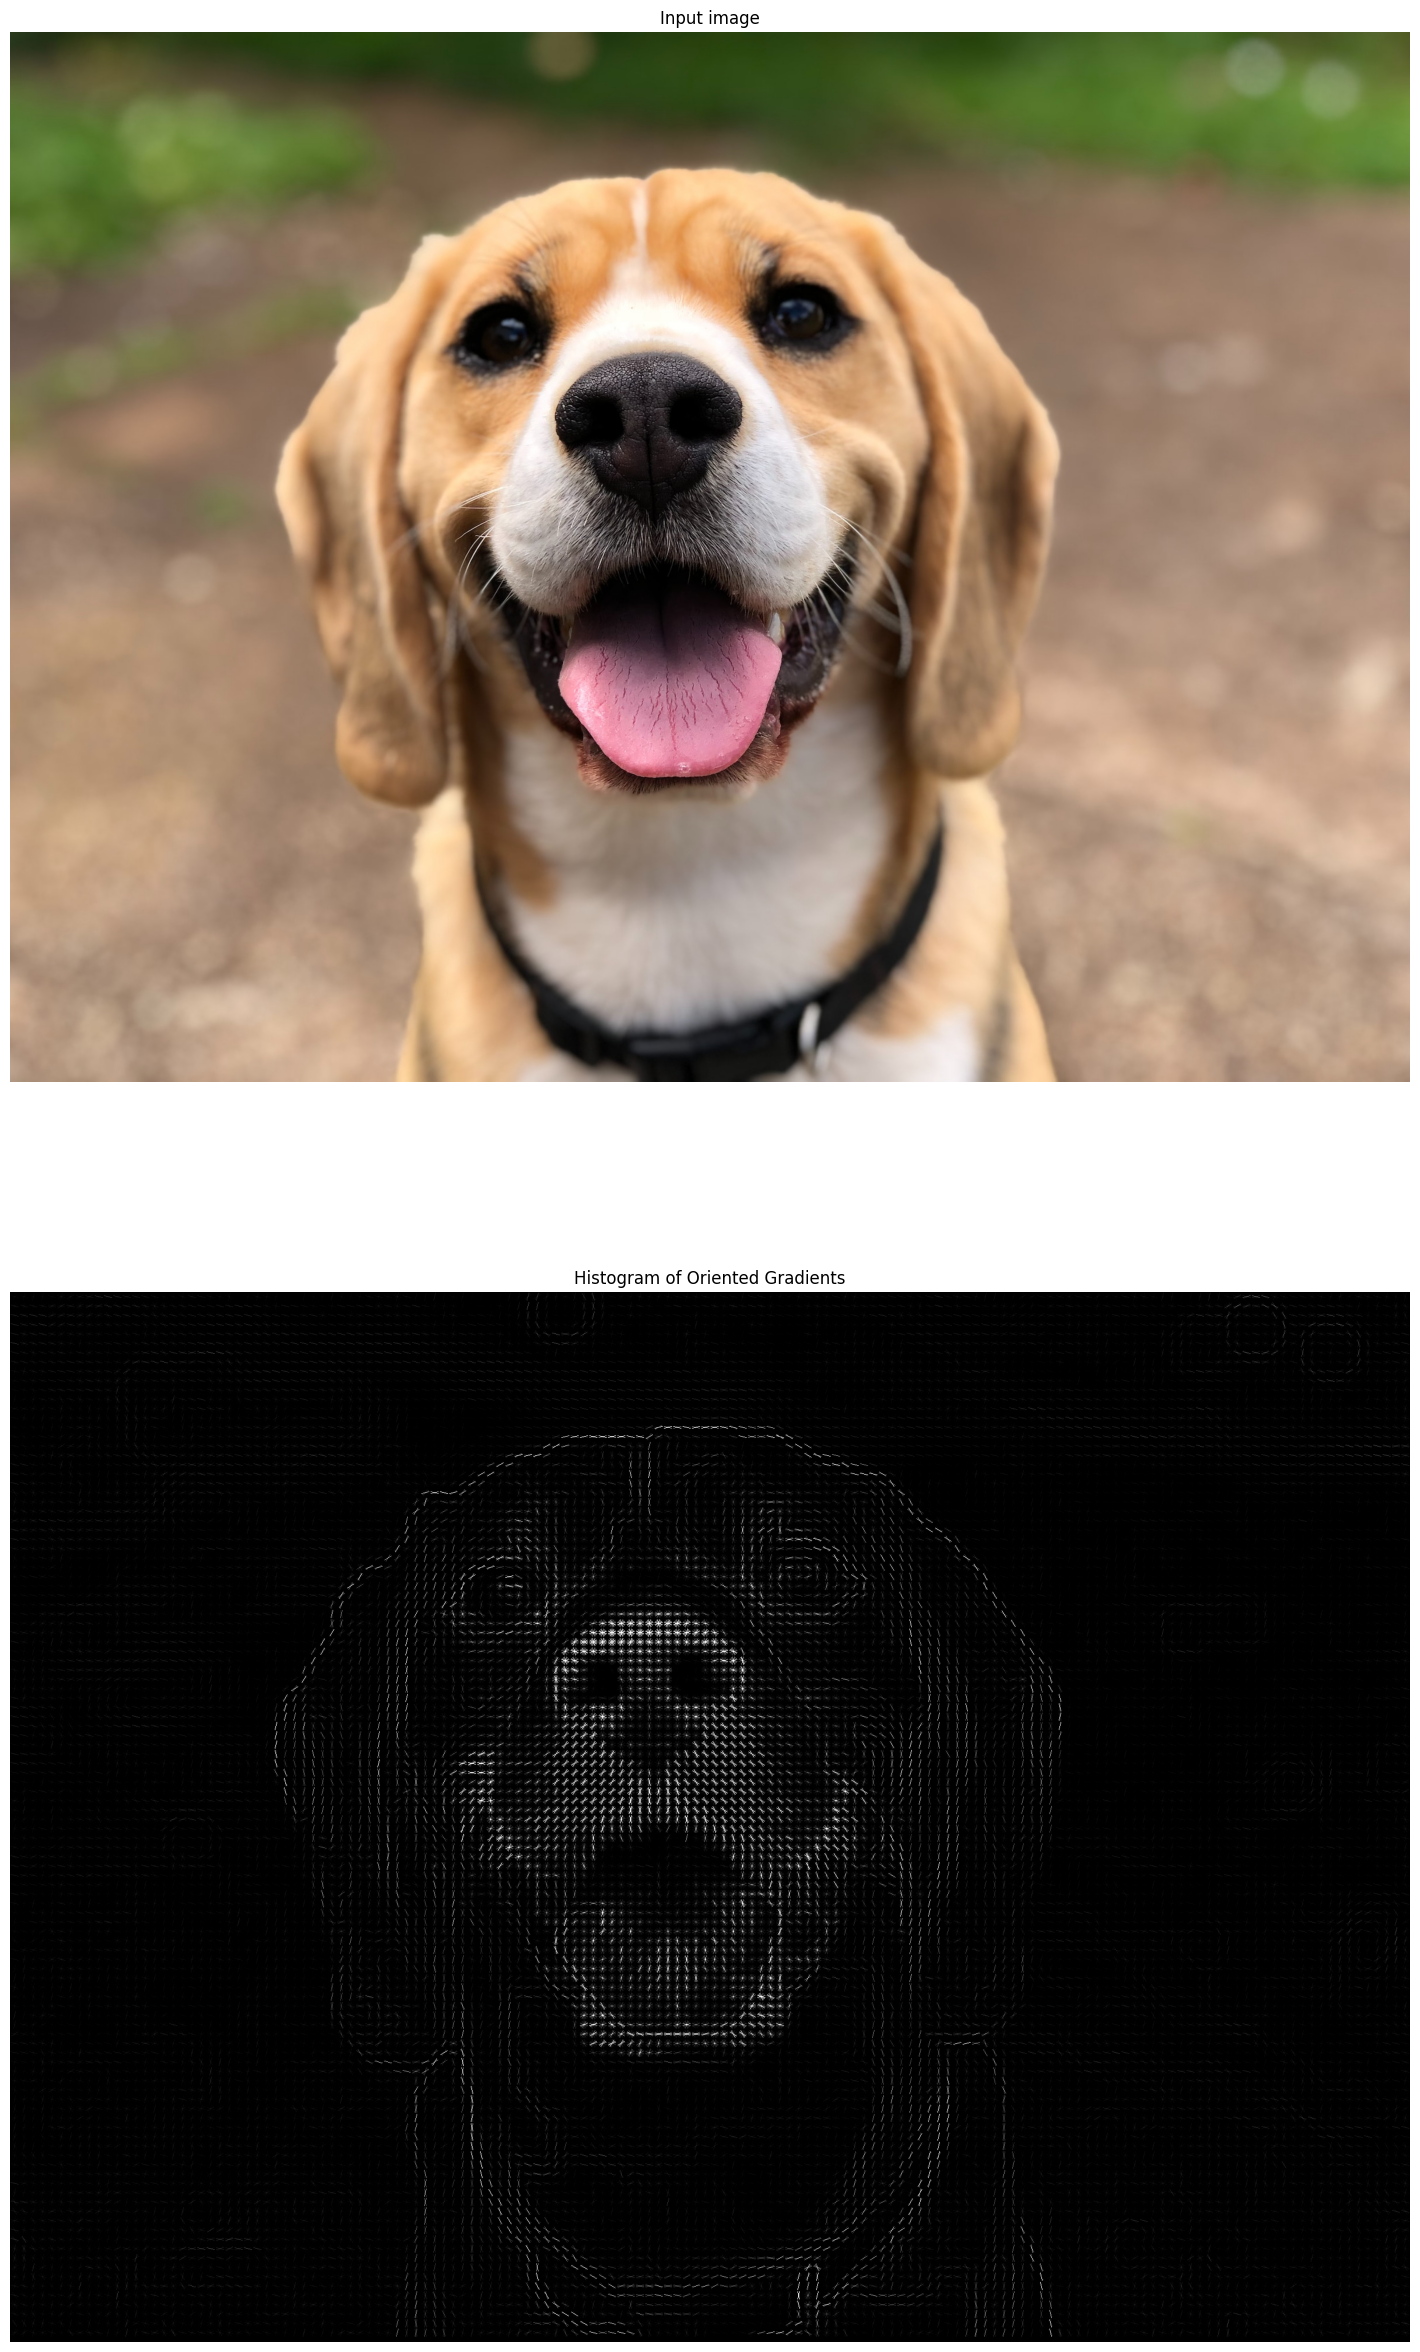

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 30), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img1, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()